In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Text(0.5, 1.0, 'SVD Singular Value Spectrum')

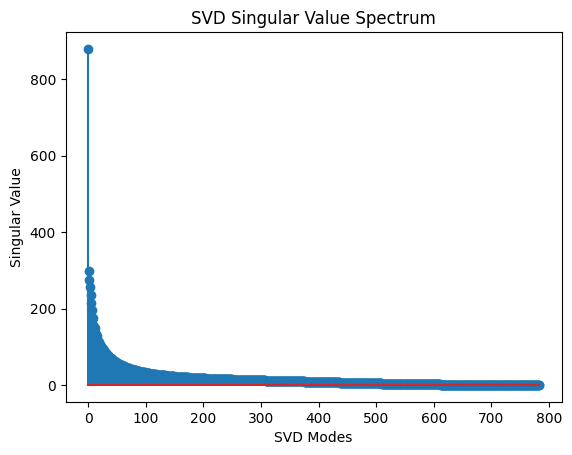

In [ ]:
X_col = X[:20000].T
U, S, Vh = np.linalg.svd(X_col)

plt.stem(S)
plt.xlabel("SVD Modes")
plt.ylabel("Singular Value")
plt.title("SVD Singular Value Spectrum")

In [ ]:
target = 0.9
current = 0.0
i = 0
while (current < target):
  current += S[i]**2 / np.sum(S**2)
  i += 1
print(i)

52


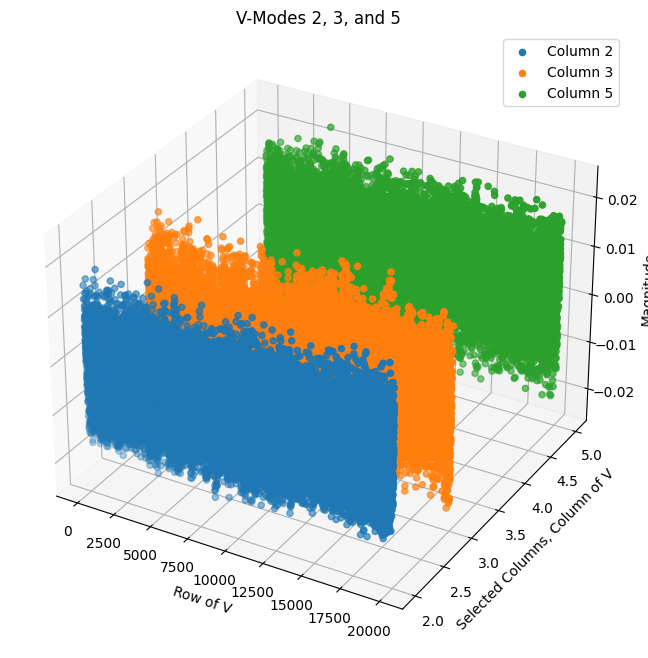

In [ ]:
V = Vh.T

fig = plt.figure(figsize=(10, 8))

x_n = np.arange(0, 20000)

ax = plt.axes(projection='3d')
ax.scatter(x_n, 2, V[:, 2], label='Column 2')
ax.scatter(x_n, 3, V[:, 3], label='Column 3')
ax.scatter(x_n, 5, V[:, 5], label='Column 5')
ax.set_xlabel('Row of V')
ax.set_ylabel('Selected Columns, Column of V')
ax.set_zlabel('Magnitude')
plt.title("V-Modes 2, 3, and 5")
plt.legend()

plt.show()

In [18]:
pca = PCA(n_components=52)
X_pca = pca.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Select only the digit 4 and 9 images
X_cropped = X_pca[np.logical_or(y == '6', y == '9')]
y_cropped = y[np.logical_or(y == '6', y == '9')]

# verify selection
np.unique(y_cropped)
#array([6, 9])

# Now split them
X_train, X_test, y_train, y_test = train_test_split(X_cropped, y_cropped, test_size=0.2)

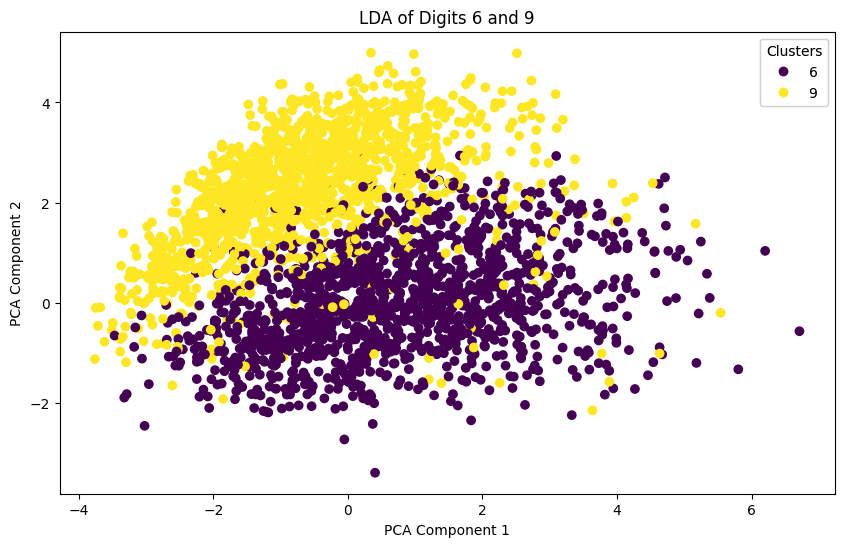

Accuracy: 0.9960245753523672


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

desired_array = [int(numeric_string) for numeric_string in y_pred]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('LDA of Digits 6 and 9')
plt.show()
# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

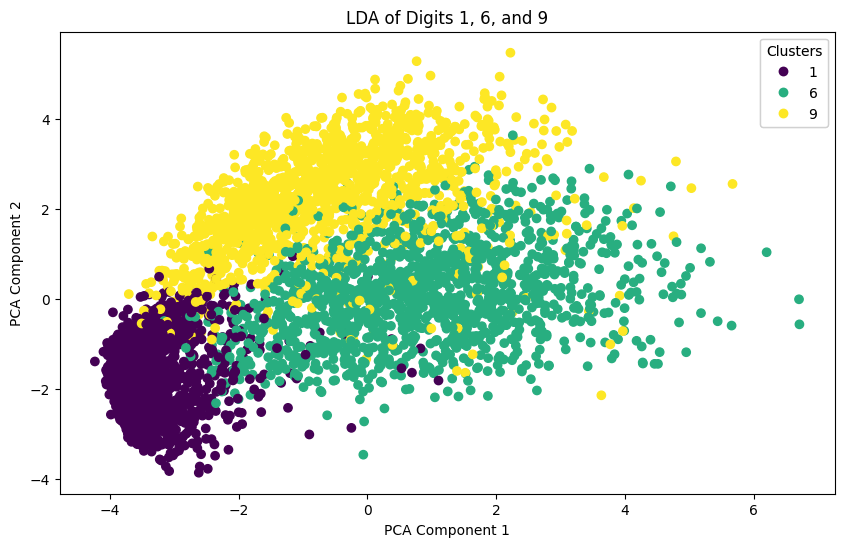

Accuracy: 0.9877964540640111


In [21]:
#Select only the digit 4 and 9 images
X_cropped = X_pca[np.logical_or(y == '1', np.logical_or(y == '6', y == '9'))]
y_cropped = y[np.logical_or(y == '1', np.logical_or(y == '6', y == '9'))]

# verify selection
np.unique(y_cropped)
#array([1, 6, 9])

# Now split them
X_train, X_test, y_train, y_test = train_test_split(X_cropped, y_cropped, test_size=0.2)

clf = LDA()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

desired_array = [int(numeric_string) for numeric_string in y_pred]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('LDA of Digits 1, 6, and 9')
plt.show()

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

In [22]:
for i in range (0, 10):
  for j in range (0, 10):
    if (i != j and i < j):
      #Select only the digit 4 and 9 images
      X_cropped = X_pca[np.logical_or(y == str(i), y == str(j))]
      y_cropped = y[np.logical_or(y == str(i), y == str(j))]

      # verify selection
      np.unique(y_cropped)

      # Now split them
      X_train, X_test, y_train, y_test = train_test_split(X_cropped, y_cropped, test_size=0.2)

      clf = LDA()
      clf.fit(X_train, y_train)

      y_pred = clf.predict(X_test)

      # Calculate the accuracy of the classifier on the test set
      accuracy = accuracy_score(y_test, y_pred)
      print(str(i) + " vs. " + str(j) + " Accuracy: " + str(accuracy))

0 vs. 1 Accuracy: 0.996617050067659
0 vs. 2 Accuracy: 0.983447283195394
0 vs. 3 Accuracy: 0.9928800284798861
0 vs. 4 Accuracy: 0.9959941733430444
0 vs. 5 Accuracy: 0.9818456883509834
0 vs. 6 Accuracy: 0.987300435413643
0 vs. 7 Accuracy: 0.995774647887324
0 vs. 8 Accuracy: 0.9839766933721777
0 vs. 9 Accuracy: 0.991345113595384
1 vs. 2 Accuracy: 0.9835238735709482
1 vs. 3 Accuracy: 0.987017310252996
1 vs. 4 Accuracy: 0.995239714382863
1 vs. 5 Accuracy: 0.9887244538407329
1 vs. 6 Accuracy: 0.9962724500169434
1 vs. 7 Accuracy: 0.990112063282795
1 vs. 8 Accuracy: 0.9625977558653519
1 vs. 9 Accuracy: 0.9925851027974385
2 vs. 3 Accuracy: 0.9667492041032897
2 vs. 4 Accuracy: 0.9790083242851972
2 vs. 5 Accuracy: 0.9635475385193536
2 vs. 6 Accuracy: 0.9722422494592646
2 vs. 7 Accuracy: 0.9772488624431221
2 vs. 8 Accuracy: 0.9612739775606225
2 vs. 9 Accuracy: 0.9813620071684588
3 vs. 4 Accuracy: 0.9899749373433584
3 vs. 5 Accuracy: 0.94908955778521
3 vs. 6 Accuracy: 0.9893009985734664
3 vs. 7 Acc

SVM Accuracy: 0.9831428571428571


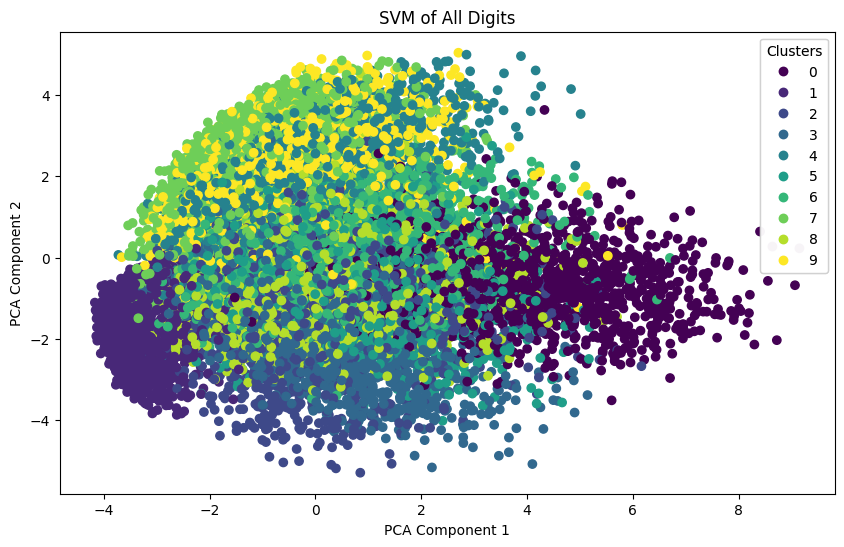

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf_1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_1.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("SVM Accuracy: " + str(accuracy_1))

desired_array = [int(numeric_string) for numeric_string in y_pred_1]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM of All Digits')
plt.show()

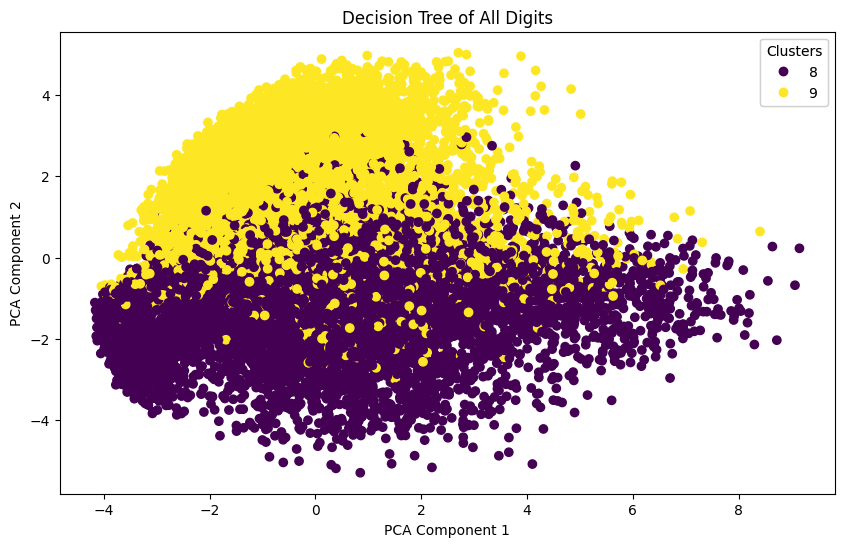

Decision Tree Accuracy: 0.19235714285714287


In [24]:
from sklearn import tree

clf_2 = tree.DecisionTreeClassifier(max_depth=10)
clf_2.fit(X_train, y_train)
score2 = clf_2.score(X_test, y_test)

y_pred_2 = clf.predict(X_test)

desired_array = [int(numeric_string) for numeric_string in y_pred_2]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Tree of All Digits')
plt.show()

# Calculate the accuracy of the classifier on the test set
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Decision Tree Accuracy: " + str(accuracy_2))

LDA Accuracy: 0.9982357092448836


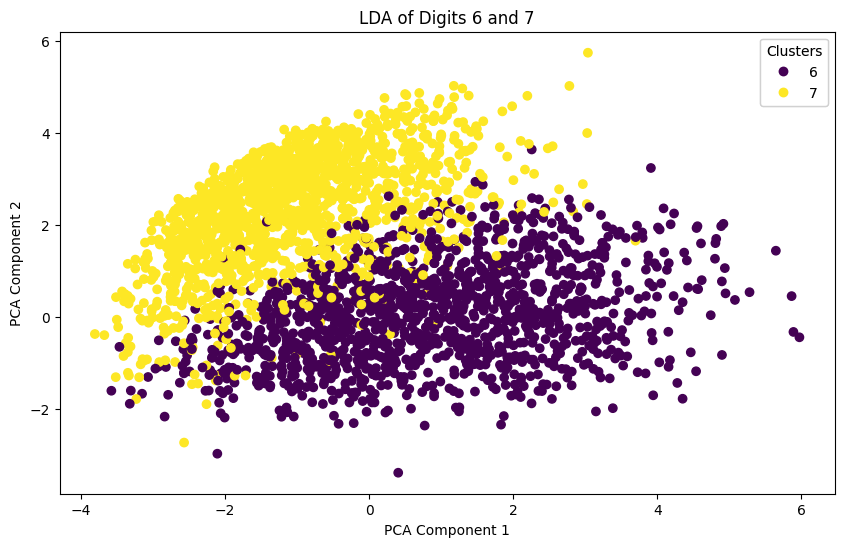

In [26]:
#Select only the digit 6 and 7 images
X_cropped = X_pca[np.logical_or(y == '6', y == '7')]
y_cropped = y[np.logical_or(y == '6', y == '7')]

# verify selection
np.unique(y_cropped)

# Now split them
X_train, X_test, y_train, y_test = train_test_split(X_cropped, y_cropped, test_size=0.2)

clf_1 = LDA()
clf_1.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("LDA Accuracy: " + str(accuracy_1))

desired_array = [int(numeric_string) for numeric_string in y_pred_1]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('LDA of Digits 6 and 7')
plt.show()

SVM Accuracy: 1.0


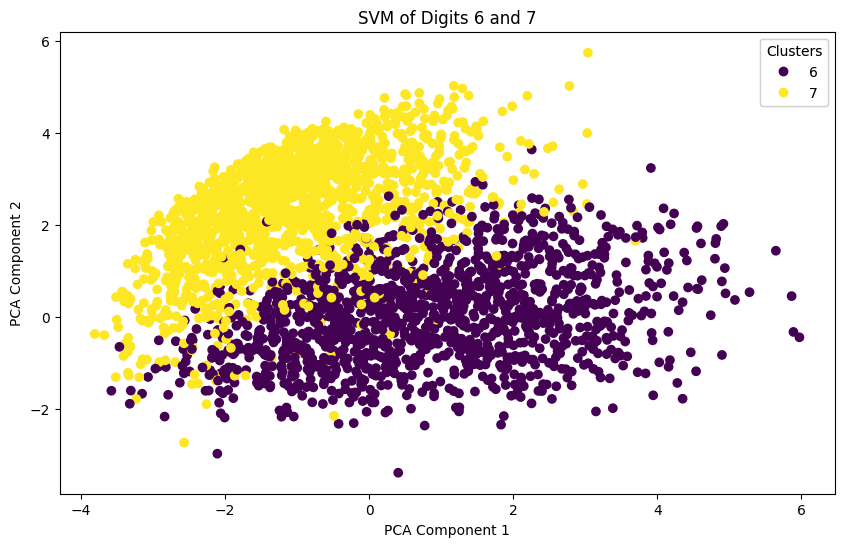

In [27]:
clf_2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("SVM Accuracy: " + str(accuracy_2))

desired_array = [int(numeric_string) for numeric_string in y_pred_2]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM of Digits 6 and 7')
plt.show()

Decision Tree Accuracy: 0.9904728299223712


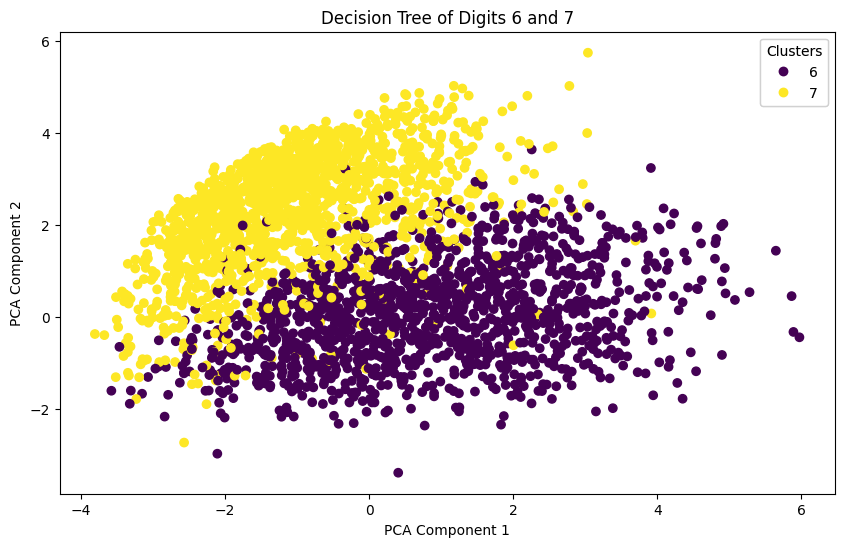

In [28]:
clf_3 = tree.DecisionTreeClassifier()
clf_3.fit(X_train, y_train)

y_pred_3 = clf_3.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Decision Tree Accuracy: " + str(accuracy_3))

desired_array = [int(numeric_string) for numeric_string in y_pred_3]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Tree of Digits 6 and 7')
plt.show()

LDA Accuracy: 0.9435154217762913


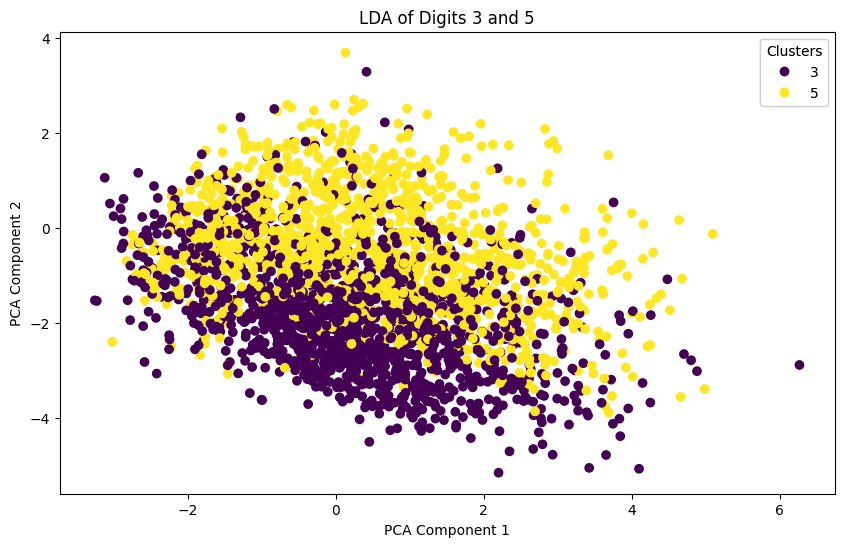

In [29]:
#Select only the digit 3 and 5 images
X_cropped = X_pca[np.logical_or(y == '3', y == '5')]
y_cropped = y[np.logical_or(y == '3', y == '5')]

# verify selection
np.unique(y_cropped)

# Now split them
X_train, X_test, y_train, y_test = train_test_split(X_cropped, y_cropped, test_size=0.2)

clf_1 = LDA()
clf_1.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("LDA Accuracy: " + str(accuracy_1))

desired_array = [int(numeric_string) for numeric_string in y_pred_1]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('LDA of Digits 3 and 5')
plt.show()

SVM Accuracy: 0.9903381642512077


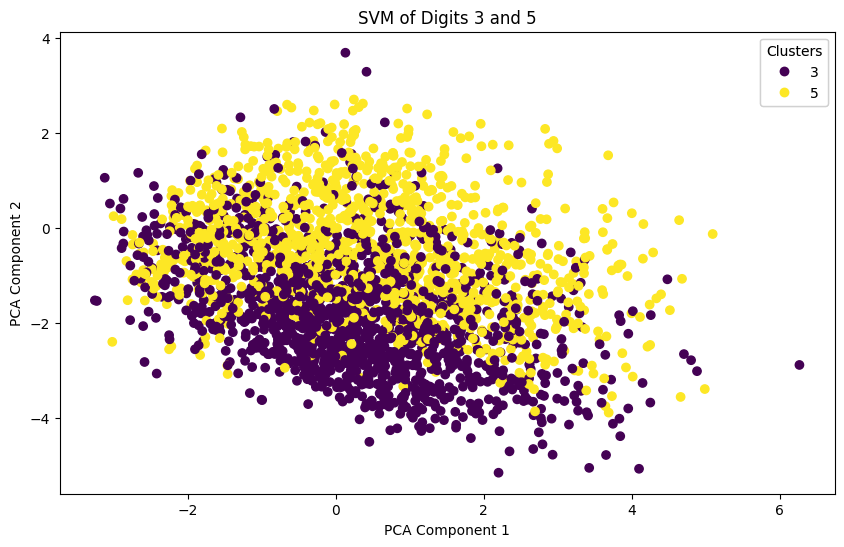

In [30]:
clf_2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("SVM Accuracy: " + str(accuracy_2))

desired_array = [int(numeric_string) for numeric_string in y_pred_2]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM of Digits 3 and 5')
plt.show()

Decision Tree Accuracy: 0.9208472686733556


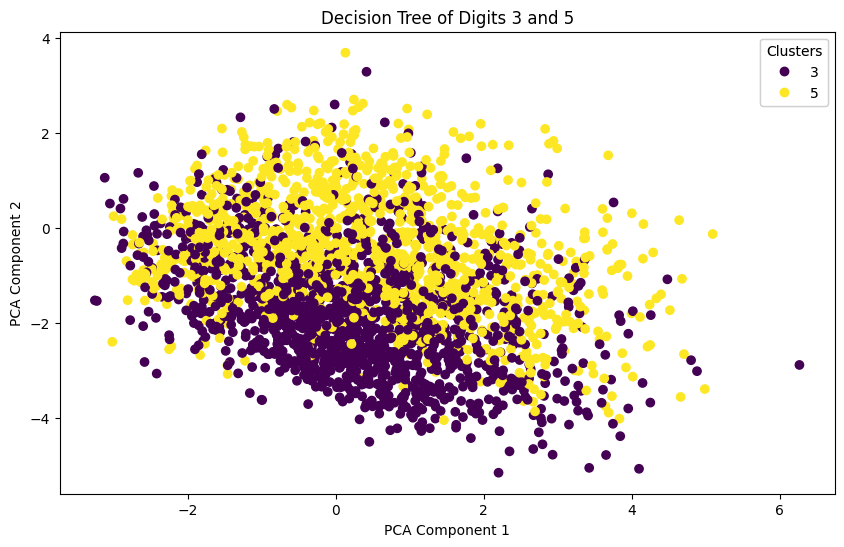

In [31]:
clf_3 = tree.DecisionTreeClassifier()
clf_3.fit(X_train, y_train)

y_pred_3 = clf_3.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Decision Tree Accuracy: " + str(accuracy_3))

desired_array = [int(numeric_string) for numeric_string in y_pred_3]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=desired_array, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Tree of Digits 3 and 5')
plt.show()